In [55]:
import pyaudio
import struct
import numpy
import matplotlib.pyplot as plt

CHUNK = 1024 * 4 #Samples per frame
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

In [57]:
p = pyaudio.PyAudio()
# stream = p.open(
#     format = FORMAT,
#     channels = CHANNELS,
#     rate=RATE,
#     input=True,
#     output=True,
#     frames_per_buffer=CHUNK
# )

# data = stream.read(CHUNK)
# data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
# data_int

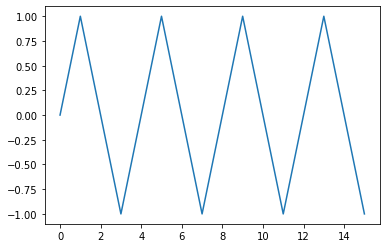

In [50]:
from math import sin, pi
from matplotlib import pyplot as plt
import numpy

func = list()
for i in numpy.arange(0, 8, 0.5):
    func.append(round(sin(i*pi)))

plt.plot(func)
plt.show()


In [51]:
from scipy import fftpack
transformed = fftpack.fft(func)
transformed

array([0.-0.j, 0.+0.j, 0.-0.j, 0.+0.j, 0.-8.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.-0.j, 0.-0.j, 0.-0.j, 0.-0.j, 0.+8.j, 0.-0.j, 0.+0.j, 0.-0.j])

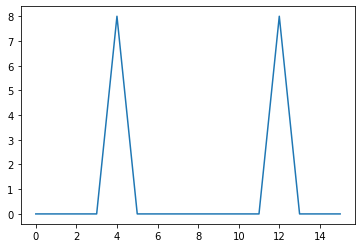

In [52]:
import matplotlib.pyplot as plt

plt.plot(abs(transformed))

plt.show()